# **This a my capstone project towards my internship training with Trestle Academy Ghana.**

# **Introductioon**
In this project I am developing a next word prdiction model using neural networks

Step 1: Importing needed libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


Loading the data

In [2]:
with open('/content/drive/MyDrive/Trestle/stories.txt') as file:
  text = file.read() #data is text data
text

'\n\n\n\n\n\n\n\n\n\n\n\n     To Sherlock Holmes she is always the woman. I have seldom heard him\n     mention her under any other name. In his eyes she eclipses and\n     predominates the whole of her sex. It was not that he felt any\n     emotion akin to love for Irene Adler. All emotions, and that one\n     particularly, were abhorrent to his cold, precise but admirably\n     balanced mind. He was, I take it, the most perfect reasoning and\n     observing machine that the world has seen, but as a lover he would\n     have placed himself in a false position. He never spoke of the softer\n     passions, save with a gibe and a sneer. They were admirable things\n     for the observer--excellent for drawing the veil from men\'s motives\n     and actions. But for the trained reasoner to admit such intrusions\n     into his own delicate and finely adjusted temperament was to\n     introduce a distracting factor which might throw a doubt upon all his\n     mental results. Grit in a sensiti

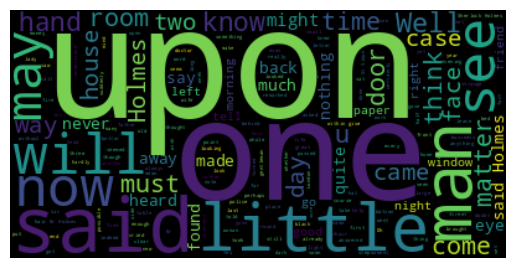

In [3]:
#wordcloud of raw text
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create the WordCloud object
wordcloud = WordCloud()

# Generate the word cloud
wordcloud.generate(text)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Show the plot
plt.show()


Step 2: Preprocessing

Handling Newlines and Whitespace

In [4]:

text_cleaned = ' '.join(text.split())  # Remove extra whitespace and newlines

# Now 'text_cleaned' contains the text data with normalized whitespace


Cleaning HTML or Markup Tags using BeautifulSoup

In [5]:
from bs4 import BeautifulSoup

# Assuming 'text' contains your raw text data with HTML tags
soup = BeautifulSoup(text_cleaned, 'html.parser')
cleaned_text = soup.get_text()


In [6]:
cleaned_text

'To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer--excellent for drawing the veil from men\'s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong e

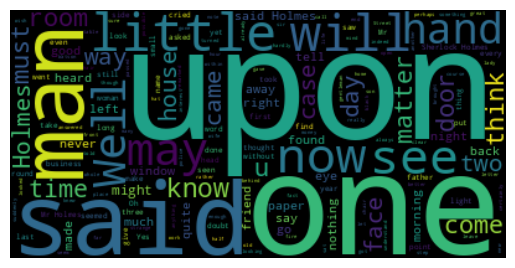

In [7]:
#wordcloud after preprocessing

# Create the WordCloud object
wordcloud = WordCloud()

# Generate the word cloud
wordcloud.generate(cleaned_text)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Show the plot
plt.show()


3. Tokenize the text file into sequence of words



In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])
total_words = len(tokenizer.word_index)+1

4. Creating input output pairs by splitting the text and form n grams

In [9]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


5. Pad the input sequence to have equal length

In [10]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


6. spliting the sequences into input and outpout

In [11]:
X = input_sequences[:,:-1]
y= input_sequences[:,-1]

7. Convert the output to one-hot encoded vectors

In [12]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

8. Building the Neural Network architecture to train the model

In [13]:
from keras.api._v2.keras import activations
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           817200    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8172)              1233972   
                                                                 
Total params: 2201772 (8.40 MB)
Trainable params: 2201772 (8.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


9. Compilling and Training the model

In [14]:
%%time

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
3004/3004 [==============================] - 53s 14ms/step - loss: 6.2199 - accuracy: 0.0777
Epoch 2/100
3004/3004 [==============================] - 25s 8ms/step - loss: 5.4967 - accuracy: 0.1247
Epoch 3/100
3004/3004 [==============================] - 24s 8ms/step - loss: 5.1136 - accuracy: 0.1476
Epoch 4/100
3004/3004 [==============================] - 22s 7ms/step - loss: 4.7875 - accuracy: 0.1653
Epoch 5/100
3004/3004 [==============================] - 23s 8ms/step - loss: 4.4867 - accuracy: 0.1833
Epoch 6/100
3004/3004 [==============================] - 23s 8ms/step - loss: 4.2001 - accuracy: 0.2038
Epoch 7/100
3004/3004 [==============================] - 23s 8ms/step - loss: 3.9295 - accuracy: 0.2300
Epoch 8/100
3004/3004 [==============================] - 23s 8ms/step - loss: 3.6702 - accuracy: 0.2598
Epoch 9/100
3004/3004 [==============================] - 23s 8ms/step - loss: 3.4281 - accuracy: 0.2921
Epoch 10/100
3004/3004 [==============================] - 23s 8

Saving and loading the model

In [15]:
import pickle
from keras.models import save_model, load_model

save_model(model, 'next_word_model.keras')
pickle.dump(history, open("history.p", "wb"))

model = load_model('next_word_model.keras')
history = pickle.load(open("history.p", "rb"))

Visualizing the Evaluation (loss and accuracy)

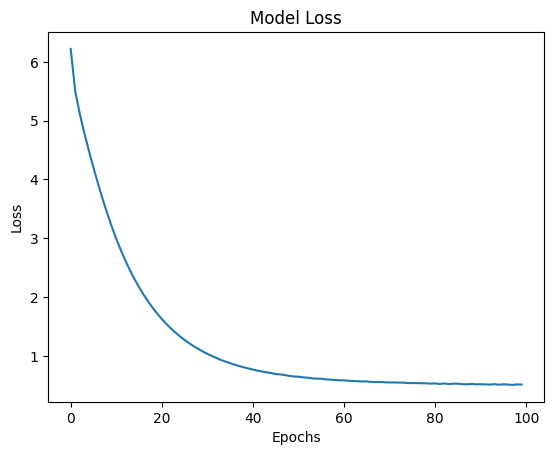

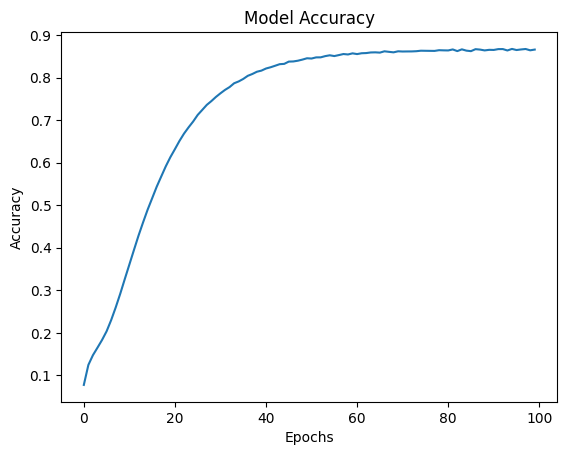

In [16]:
import matplotlib.pyplot as plt


# Plot loss vs. epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot accuracy vs. epochs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


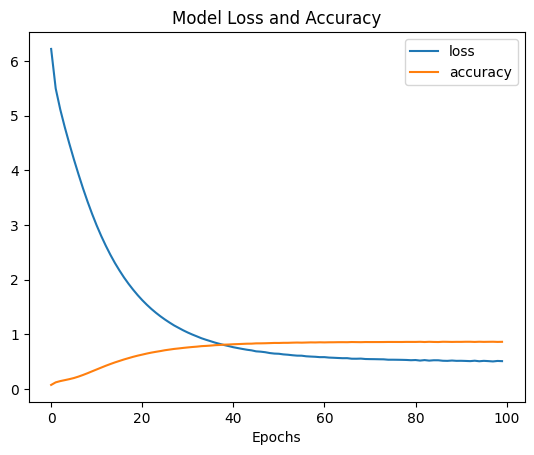

In [17]:
import matplotlib.pyplot as plt


# Plot loss and accuracy on the same figure
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


Loading the Model

In [18]:
from keras.models import load_model

# Load the model
model = load_model('next_word_model.keras')
history = pickle.load(open("history.p", "rb"))

10. Testing the model by generating next word prediction

The model takes user input from the user as seed text and number of predictions

In [21]:
# Get user input for the seed text
print('Taking user inputs of seed text and number of words to predict')

seed_text = input("Please enter the seed text: ")

while True:
    try:
        next_words_num = int(input("Please enter the number of words to predict (enter 0 to exit): "))
        if next_words_num < 0:
            print("Please enter a positive integer.")
            continue
        elif next_words_num == 0:
            break

        # Generate predictions
        for _ in range(next_words_num):
            token_list = tokenizer.texts_to_sequences([seed_text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
            predicted = np.argmax(model.predict(token_list), axis=-1)

            output_word = ''
            for word, index in tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break

            seed_text += ' ' + output_word

        print('The prediction:')
        print(seed_text)

    except ValueError:
        print("Invalid input. Please enter a valid positive integer.")

print("Thank you for using our system.")

Taking user inputs of seed text and number of words to predict
Please enter the seed text: The team
Please enter the number of words to predict (enter 0 to exit): 2
1/1 [==============================] - 0s 26ms/step
The prediction:
The team man who
Please enter the number of words to predict (enter 0 to exit): 2
1/1 [==============================] - 0s 18ms/step
The prediction:
The team man who entered was
Please enter the number of words to predict (enter 0 to exit): 3
1/1 [==============================] - 0s 18ms/step
The prediction:
The team man who entered was a sturdy middle
Please enter the number of words to predict (enter 0 to exit): 1
1/1 [==============================] - 0s 21ms/step
The prediction:
The team man who entered was a sturdy middle sized
Please enter the number of words to predict (enter 0 to exit): 1
1/1 [==============================] - 0s 21ms/step
The prediction:
The team man who entered was a sturdy middle sized fellow
Please enter the number of words to

# **Conclusion**
The nextword prediction model is able to perfectly predict proceding set of words based on series of words the user provides.

# ***Thank you***